<a href="https://colab.research.google.com/github/anishbhujbal7/india-vs-south-korea-population-analysis/blob/main/south_korea_vs_india_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
file_path='/content/drive/MyDrive/colab_datasets/Demographic_analysis/WPP2024_Demographic_Indicators_Medium (1).csv'

In [110]:
import pandas as pd

df=pd.read_csv(file_path)


<ipython-input-110-2688271372>:3: DtypeWarning: Columns (2,3,4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(file_path)


# Data Prepration and Filtering

In [111]:
# Filter for Republic of Korea and India with Medium projection only
countries_df = df[
    (df['Location'].isin(['Republic of Korea', 'India'])) &
    (df['Variant'] == 'Medium')
].copy()

In [112]:
columns_of_interest = [
    'Location', 'Time', 'TPopulation1July', 'TPopulationMale1July', 'TPopulationFemale1July',
    'Births', 'Deaths', 'MedianAgePop', 'PopGrowthRate', 'NetMigrations'
]


In [113]:
clean_df=countries_df[columns_of_interest]
clean_df.head()

,Location,Time,TPopulation1July,TPopulationMale1July,TPopulationFemale1July,Births,Deaths,MedianAgePop,PopGrowthRate,NetMigrations
56088,Republic of Korea,1950,19757.321,10089.463,9667.858,784.803,931.034,17.6863,0.002,146.698
56089,Republic of Korea,1951,19868.990,10018.324,9850.666,811.470,754.519,17.4779,1.122,165.917
56090,Republic of Korea,1952,20229.879,10144.220,10085.660,842.481,516.717,17.4542,2.466,173.145
56091,Republic of Korea,1953,20775.325,10415.249,10360.076,879.007,458.268,17.5650,2.850,171.248
56092,Republic of Korea,1954,21415.573,10751.396,10664.176,910.760,385.241,17.7120,3.215,162.989


In [114]:
clean_df.isnull().sum()
clean_df.shape

(304, 10)

In [115]:
clean_df.describe()


,Time,TPopulation1July,TPopulationMale1July,TPopulationFemale1July,Births,Deaths,MedianAgePop,PopGrowthRate,NetMigrations
count,304.000000,3.020000e+02,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,2025.500000,6.390111e+05,326647.48656,312363.573593,10676.239778,6703.701848,36.601929,0.520185,-129.034228
std,43.950017,6.843860e+05,349457.70851,334974.670189,10800.831964,7090.712460,15.458306,1.338728,268.521968
min,1950.000000,1.975732e+04,10018.32400,9667.858000,119.211000,234.534000,17.454200,-1.574000,-1353.478000
25%,1987.750000,4.046535e+04,19950.36450,20414.862500,256.710500,427.462500,20.460050,-0.454000,-349.602250
50%,2025.500000,1.990687e+05,101885.09350,97192.116000,7126.729000,4391.626000,35.418500,0.418000,-27.193500
75%,2063.250000,1.460633e+06,753162.44350,707470.648000,20512.583250,10012.381750,47.503650,1.733250,20.100250
max,2101.000000,1.701284e+06,864648.85200,837100.821000,29324.930000,21060.119000,63.039100,3.401000,774.094000


In [116]:
clean_df.drop_duplicates(inplace=True)
clean_df.shape

<ipython-input-116-4175470412>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.drop_duplicates(inplace=True)


(304, 10)

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns




## chossing the desired attributes

In [118]:
columns_of_interest = [
    'Location', 'Time', 'TPopulation1July', 'TPopulationMale1July', 'TPopulationFemale1July',
    'Births', 'Deaths', 'MedianAgePop', 'PopGrowthRate', 'NetMigrations',
    'TFR'  # <- added this
]
clean_df=countries_df[columns_of_interest]
clean_df.head()

,Location,Time,TPopulation1July,TPopulationMale1July,TPopulationFemale1July,Births,Deaths,MedianAgePop,PopGrowthRate,NetMigrations,TFR
56088,Republic of Korea,1950,19757.321,10089.463,9667.858,784.803,931.034,17.6863,0.002,146.698,6.0628
56089,Republic of Korea,1951,19868.990,10018.324,9850.666,811.470,754.519,17.4779,1.122,165.917,6.0891
56090,Republic of Korea,1952,20229.879,10144.220,10085.660,842.481,516.717,17.4542,2.466,173.145,6.1215
56091,Republic of Korea,1953,20775.325,10415.249,10360.076,879.007,458.268,17.5650,2.850,171.248,6.1711
56092,Republic of Korea,1954,21415.573,10751.396,10664.176,910.760,385.241,17.7120,3.215,162.989,6.1738


# Data Visulization

## 1) Fertility Rate Trends (till 2025)

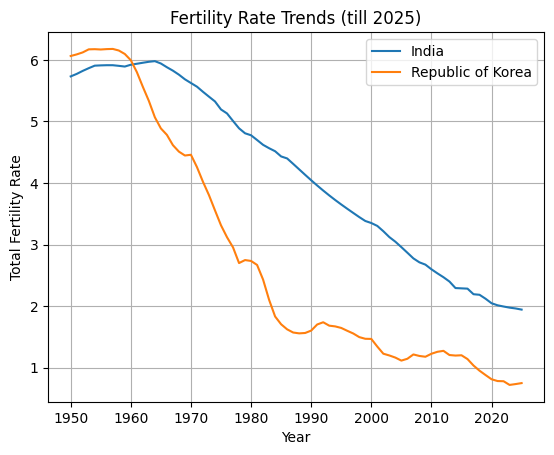

In [119]:
filtered_df = clean_df[clean_df['Time'] <= 2025]

# Plot fertility trends
for country in ['India', 'Republic of Korea']:
    country_df = filtered_df[filtered_df['Location'] == country]
    plt.plot(country_df['Time'], country_df['TFR'], label=country)

plt.xlabel('Year')
plt.ylabel('Total Fertility Rate')
plt.title('Fertility Rate Trends (till 2025)')
plt.legend()
plt.grid(True)
plt.show()

### we see that fertility rate of South Korea is declining rapidly with 2020 havin around 0.75 as fertility rate (a fertility rate of 2.1 esures a ensures a broadly stable population)

In [120]:
tfr_2023 = clean_df[(clean_df['Time'] == 2020) &
                    (clean_df['Location'].isin(['India', 'Republic of Korea']))][['Location', 'TFR']]

print(tfr_2023)


                Location     TFR
56158  Republic of Korea  0.8121
56918              India  2.0468


## 2) Elderly and Working-Age Population in South Korea

In [121]:
columns_of_interest = [
    'Location', 'Time', 'TPopulation1July', 'TPopulationMale1July', 'TPopulationFemale1July',
    'Births', 'Deaths', 'MedianAgePop', 'PopGrowthRate', 'NetMigrations',
    'TFR', 'LEx', 'LExMale', 'LExFemale', 'LE15', 'LE65', 'CBR', 'CDR', 'PopSexRatio',
    'InfantDeaths', 'Under5Deaths', 'PopChange', 'LE65Male', 'LE65Female', 'LE15Male', 'LE15Female'
]

# Filter the DataFrame with the updated columns of interest
clean_df = countries_df[columns_of_interest]


In [122]:
# Step 1: Calculate the total elderly population (65 and above) using only LE65 if other columns don't exist
clean_df.loc[:, 'ElderlyPopulation'] = clean_df['LE65']

# Step 2: Calculate the working-age population (15-64)
clean_df.loc[:, 'WorkingAgePopulation'] = clean_df['TPopulation1July'] - clean_df['LE65']

# Step 3: Calculate the Elderly Dependency Ratio (EDR)
clean_df.loc[:, 'ElderlyDependencyRatio'] = clean_df['ElderlyPopulation'] / clean_df['WorkingAgePopulation']

# Step 4: Filter data for the countries you're interested in
countries_of_interest = ['Republic of Korea', 'India']
edr_df = clean_df[clean_df['Location'].isin(countries_of_interest)]

<ipython-input-122-4171849105>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[:, 'ElderlyPopulation'] = clean_df['LE65']
<ipython-input-122-4171849105>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.loc[:, 'WorkingAgePopulation'] = clean_df['TPopulation1July'] - clean_df['LE65']
<ipython-input-122-4171849105>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [123]:
print(clean_df.columns)


Index(['Location', 'Time', 'TPopulation1July', 'TPopulationMale1July',
       'TPopulationFemale1July', 'Births', 'Deaths', 'MedianAgePop',
       'PopGrowthRate', 'NetMigrations', 'TFR', 'LEx', 'LExMale', 'LExFemale',
       'LE15', 'LE65', 'CBR', 'CDR', 'PopSexRatio', 'InfantDeaths',
       'Under5Deaths', 'PopChange', 'LE65Male', 'LE65Female', 'LE15Male',
       'LE15Female', 'ElderlyPopulation', 'WorkingAgePopulation',
       'ElderlyDependencyRatio'],
      dtype='object')


In [124]:
# Check the data for South Korea to see the trends in LE65 and WorkingAgePopulation
south_korea_data = clean_df[(clean_df['Location'] == 'Republic of Korea')& (clean_df['Time'] <= 2025)]

# Display the relevant columns for South Korea
south_korea_data[['Time', 'LE65', 'TPopulation1July', 'WorkingAgePopulation', 'ElderlyDependencyRatio']].head()


,Time,LE65,TPopulation1July,WorkingAgePopulation,ElderlyDependencyRatio
56088,1950,7.3665,19757.321,19749.9545,0.000373
56089,1951,8.0752,19868.990,19860.9148,0.000407
56090,1952,9.1230,20229.879,20220.7560,0.000451
56091,1953,9.6376,20775.325,20765.6874,0.000464
56092,1954,10.1496,21415.573,21405.4234,0.000474


<ipython-input-125-939153671>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_korea_data['LE65_normalized'] = normalized_values[:, 0]
<ipython-input-125-939153671>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_korea_data['WorkingAge_normalized'] = normalized_values[:, 1]


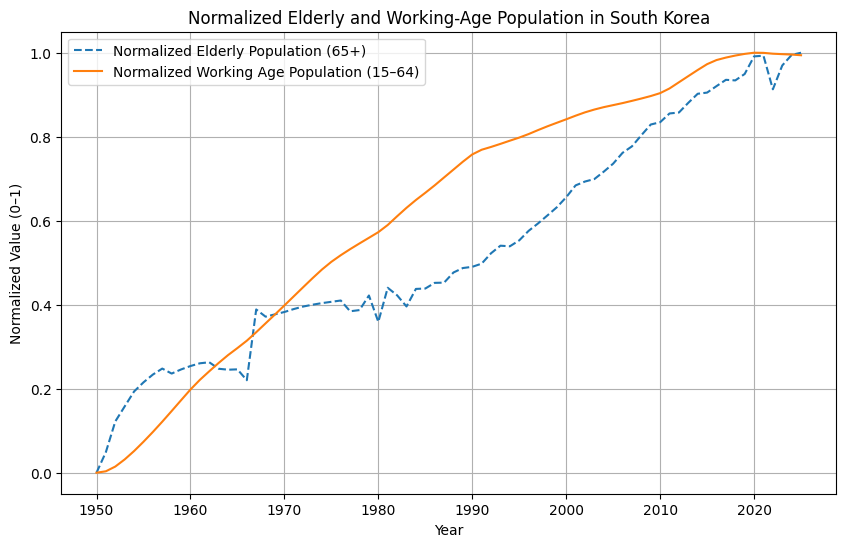

In [125]:
from sklearn.preprocessing import MinMaxScaler

# Prepare the scaler
scaler = MinMaxScaler()

# Extract the relevant features and apply scaling
normalized_values = scaler.fit_transform(
    south_korea_data[['LE65', 'WorkingAgePopulation']]
)

# Assign the normalized values back
south_korea_data['LE65_normalized'] = normalized_values[:, 0]
south_korea_data['WorkingAge_normalized'] = normalized_values[:, 1]

# Plot normalized values
plt.figure(figsize=(10, 6))
plt.plot(south_korea_data['Time'], south_korea_data['LE65_normalized'],
         label='Normalized Elderly Population (65+)', linestyle='--')
plt.plot(south_korea_data['Time'], south_korea_data['WorkingAge_normalized'],
         label='Normalized Working Age Population (15–64)', linestyle='-')

plt.title('Normalized Elderly and Working-Age Population in South Korea')
plt.xlabel('Year')
plt.ylabel('Normalized Value (0–1)')
plt.legend()
plt.grid(True)
plt.show()


### we observe that during 20th century there were signifincantly high working age population but after 2020 the elderly population started increasing and is now almost equal to the working age population. the elderly population should be below 20%, and the working-age population should be around 60–70% of the total population.


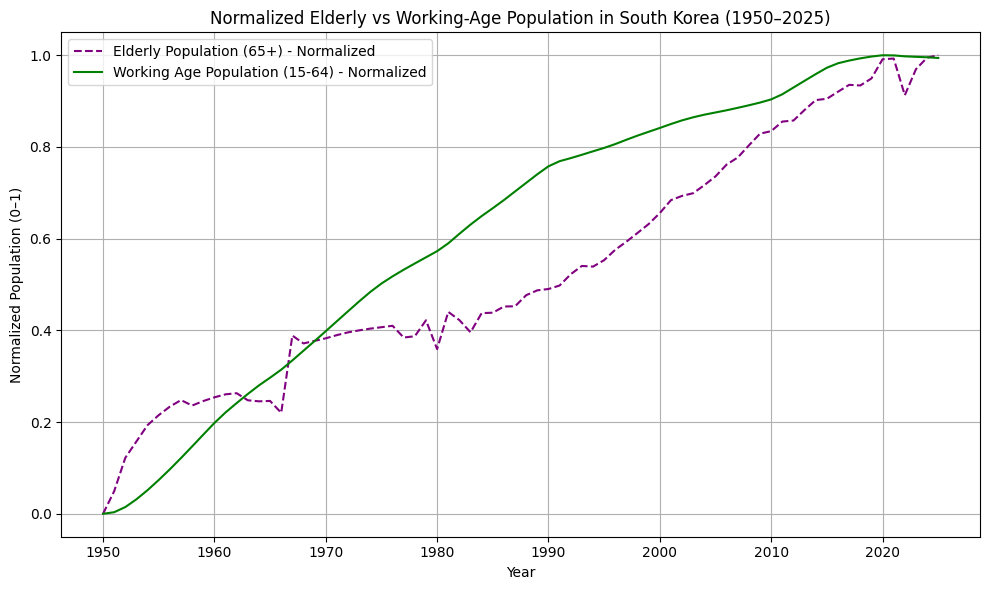

In [126]:
from sklearn.preprocessing import MinMaxScaler

# Copy to preserve original
sk_norm = south_korea_data.copy()

# Initialize scaler
scaler = MinMaxScaler()

# Normalize both columns
sk_norm[['LE65_norm', 'WorkingAge_norm']] = scaler.fit_transform(
    sk_norm[['LE65', 'WorkingAgePopulation']]
)

# Plot
plt.figure(figsize=(10, 6))

plt.plot(sk_norm['Time'], sk_norm['LE65_norm'], label='Elderly Population (65+) - Normalized', linestyle='--', color='purple')
plt.plot(sk_norm['Time'], sk_norm['WorkingAge_norm'], label='Working Age Population (15-64) - Normalized', linestyle='-', color='green')

plt.title('Normalized Elderly vs Working-Age Population in South Korea (1950–2025)')
plt.xlabel('Year')
plt.ylabel('Normalized Population (0–1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 3) Elderly Dependency Ratio in South Korea

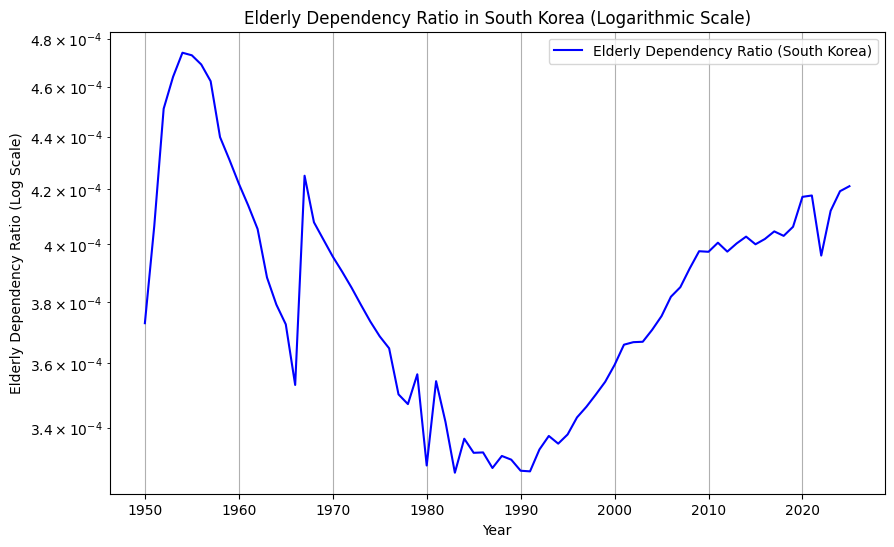

In [127]:
plt.figure(figsize=(10, 6))

# Plot Elderly Dependency Ratio for South Korea
plt.plot(south_korea_data['Time'], south_korea_data['ElderlyDependencyRatio'], label='Elderly Dependency Ratio (South Korea)', color='b')

# Set the scale to logarithmic for better visibility
plt.yscale('log')

plt.title('Elderly Dependency Ratio in South Korea (Logarithmic Scale)')
plt.xlabel('Year')
plt.ylabel('Elderly Dependency Ratio (Log Scale)')
plt.grid(True)
plt.legend()
plt.show()


### After the year 2000 South Korea saw an increase in EDR which went upto 45%. A healthy Elderly Dependency Ratio (EDR) is typically below 30%, meaning there are fewer than 30 elderly people per 100 working-age individuals.

## 4) Life Expectancy Trends





In [128]:
# Filter data for South Korea and India
south_korea_data = clean_df[(clean_df['Location'] == 'Republic of Korea') & (clean_df['Time'] <= 2025)]
india_data = clean_df[(clean_df['Location'] == 'India') & (clean_df['Time'] <= 2025)]

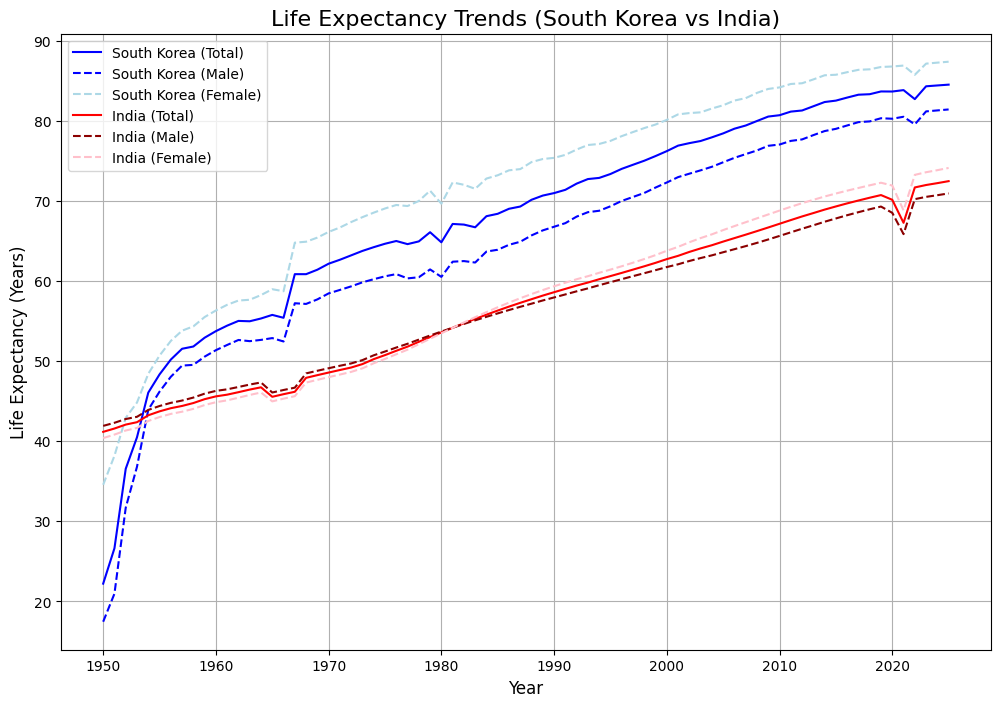

In [129]:
plt.figure(figsize=(12, 8))

# Plot Life Expectancy for South Korea
plt.plot(south_korea_data['Time'], south_korea_data['LEx'], label='South Korea (Total)', color='b')
plt.plot(south_korea_data['Time'], south_korea_data['LExMale'], label='South Korea (Male)', color='blue', linestyle='dashed')
plt.plot(south_korea_data['Time'], south_korea_data['LExFemale'], label='South Korea (Female)', color='lightblue', linestyle='dashed')

# Plot Life Expectancy for India
plt.plot(india_data['Time'], india_data['LEx'], label='India (Total)', color='r')
plt.plot(india_data['Time'], india_data['LExMale'], label='India (Male)', color='darkred', linestyle='dashed')
plt.plot(india_data['Time'], india_data['LExFemale'], label='India (Female)', color='pink', linestyle='dashed')

# Add titles and labels
plt.title('Life Expectancy Trends (South Korea vs India)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Life Expectancy (Years)', fontsize=12)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

### we observe that life expectancy of korea is higher than India. This means that more people can live past their 70s and 80s which results to a growing number of elderly people. More elderly people in a country with low fertility rate and high EDR can lead to population decline

## 5) Population Growth vs Population Death

In [130]:
sk_data = clean_df[(clean_df['Location'] == 'Republic of Korea') & (clean_df['Time'] <= 2025)]
in_data = clean_df[(clean_df['Location'] == 'India') & (clean_df['Time'] <= 2025)]

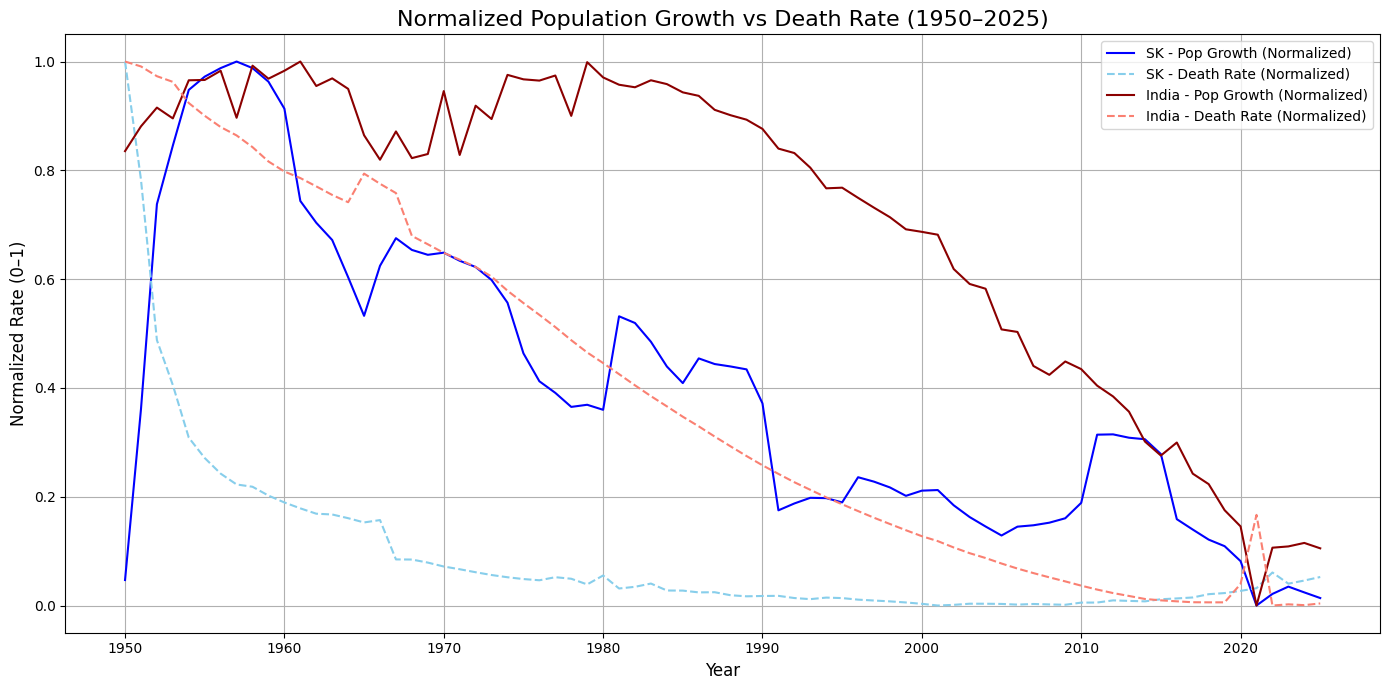

In [131]:
from sklearn.preprocessing import MinMaxScaler

# Create a copy to avoid modifying original
sk_data_norm = sk_data.copy()
in_data_norm = in_data.copy()

# Initialize scaler
scaler = MinMaxScaler()

# Normalize South Korea data
sk_data_norm[['PopGrowthRate_norm', 'CDR_norm']] = scaler.fit_transform(
    sk_data_norm[['PopGrowthRate', 'CDR']]
)

# Normalize India data
in_data_norm[['PopGrowthRate_norm', 'CDR_norm']] = scaler.fit_transform(
    in_data_norm[['PopGrowthRate', 'CDR']]
)

# Plotting
plt.figure(figsize=(14, 7))

# Plot for South Korea (normalized)
plt.plot(sk_data_norm['Time'], sk_data_norm['PopGrowthRate_norm'], label='SK - Pop Growth (Normalized)', color='blue')
plt.plot(sk_data_norm['Time'], sk_data_norm['CDR_norm'], label='SK - Death Rate (Normalized)', color='skyblue', linestyle='dashed')

# Plot for India (normalized)
plt.plot(in_data_norm['Time'], in_data_norm['PopGrowthRate_norm'], label='India - Pop Growth (Normalized)', color='darkred')
plt.plot(in_data_norm['Time'], in_data_norm['CDR_norm'], label='India - Death Rate (Normalized)', color='salmon', linestyle='dashed')

# Labels, title, legend
plt.title('Normalized Population Growth vs Death Rate (1950–2025)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Normalized Rate (0–1)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### with better healthcare and medecince in the recent years we see decline in deaths for both India and Korea but Korea's decline is more sharp when compared with India. This indicates better life expectancy

### we also seetha the population growth is less than India as well as the death rate is also very low. This implies that there are more people on the top of the population pyramid as compared to the bottom of the pyramid.(idealy population pyramid should have more people at the bottom of the pyramid)

In [132]:
india = clean_df[(clean_df['Location'] == 'India') & (clean_df['Time'] <= 2025)]
korea = clean_df[(clean_df['Location'] == 'Republic of Korea') & (clean_df['Time'] <= 2025)]

## 6) Population by Gender

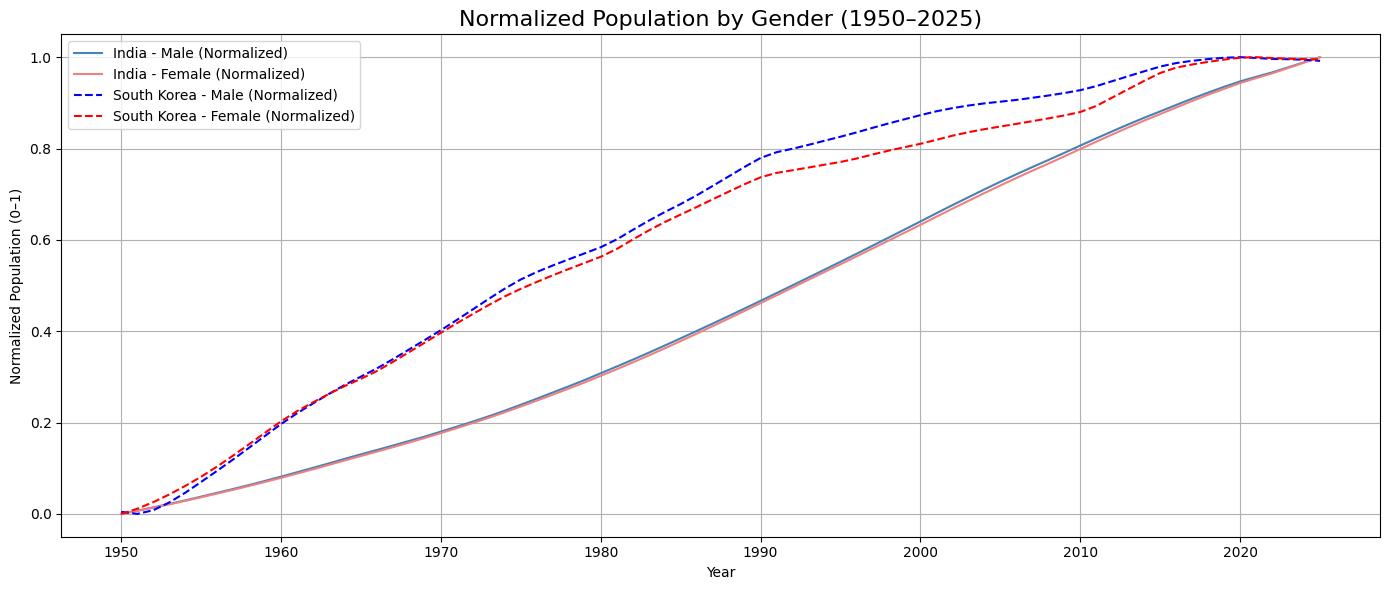

In [133]:
from sklearn.preprocessing import MinMaxScaler

# Create copies
india_norm = india.copy()
korea_norm = korea.copy()

# Initialize scaler
scaler = MinMaxScaler()

# Normalize India
india_norm[['Male_Norm', 'Female_Norm']] = scaler.fit_transform(
    india[['TPopulationMale1July', 'TPopulationFemale1July']]
)

# Normalize Korea
korea_norm[['Male_Norm', 'Female_Norm']] = scaler.fit_transform(
    korea[['TPopulationMale1July', 'TPopulationFemale1July']]
)

# Plot
plt.figure(figsize=(14, 6))

# India
plt.plot(india_norm['Time'], india_norm['Male_Norm'], label='India - Male (Normalized)', color='steelblue')
plt.plot(india_norm['Time'], india_norm['Female_Norm'], label='India - Female (Normalized)', color='lightcoral')

# South Korea
plt.plot(korea_norm['Time'], korea_norm['Male_Norm'], label='South Korea - Male (Normalized)', linestyle='dashed', color='blue')
plt.plot(korea_norm['Time'], korea_norm['Female_Norm'], label='South Korea - Female (Normalized)', linestyle='dashed', color='red')

plt.title('Normalized Population by Gender (1950–2025)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Normalized Population (0–1)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### The variance between male and female population was significant in early 2000s in South Korea but since then it has reduced. India on the other hand has less variance between male and female popultion.

## 7) The Median Age

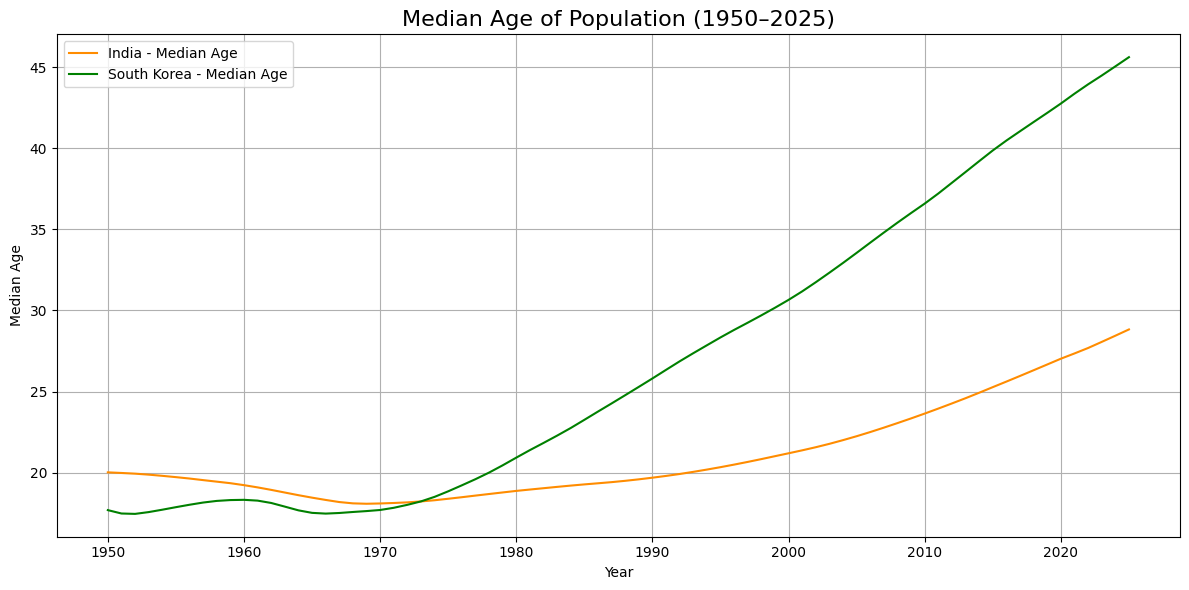

In [134]:
plt.figure(figsize=(12, 6))

plt.plot(india['Time'], india['MedianAgePop'], label='India - Median Age', color='darkorange')
plt.plot(korea['Time'], korea['MedianAgePop'], label='South Korea - Median Age', color='green')

plt.title('Median Age of Population (1950–2025)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### The ideal median age for a balanced and productive population is typically between 30 and 40 years. This range indicates a strong working-age base with manageable dependency ratios. In SOuth Korea it has reached above 45. This means that most of the people in South Korea are 45 or above 45. There are lot less young people. A stable population should have more young people like they say "Youth is the future of the country"

## 8) Normalized Natural Change vs Total Population Change (1950–2025)

In [135]:
columns_of_interest = [
    'Location', 'Time', 'TPopulation1July', 'TPopulationMale1July', 'TPopulationFemale1July',
    'Births', 'Deaths', 'MedianAgePop', 'PopGrowthRate', 'NetMigrations',
    'TFR', 'LEx', 'LExMale', 'LExFemale', 'LE15', 'LE65', 'CBR', 'CDR', 'PopSexRatio',
    'InfantDeaths', 'Under5Deaths', 'PopChange', 'LE65Male', 'LE65Female', 'LE15Male', 'LE15Female', 'NatChange', 'PopDensity'
]

# Filter the DataFrame with the updated columns of interest
clean_df = countries_df[columns_of_interest]

In [136]:
india = clean_df[(clean_df['Location'] == 'India') & (clean_df['Time'] <= 2025)]
korea = clean_df[(clean_df['Location'] == 'Republic of Korea') & (clean_df['Time'] <= 2025)]

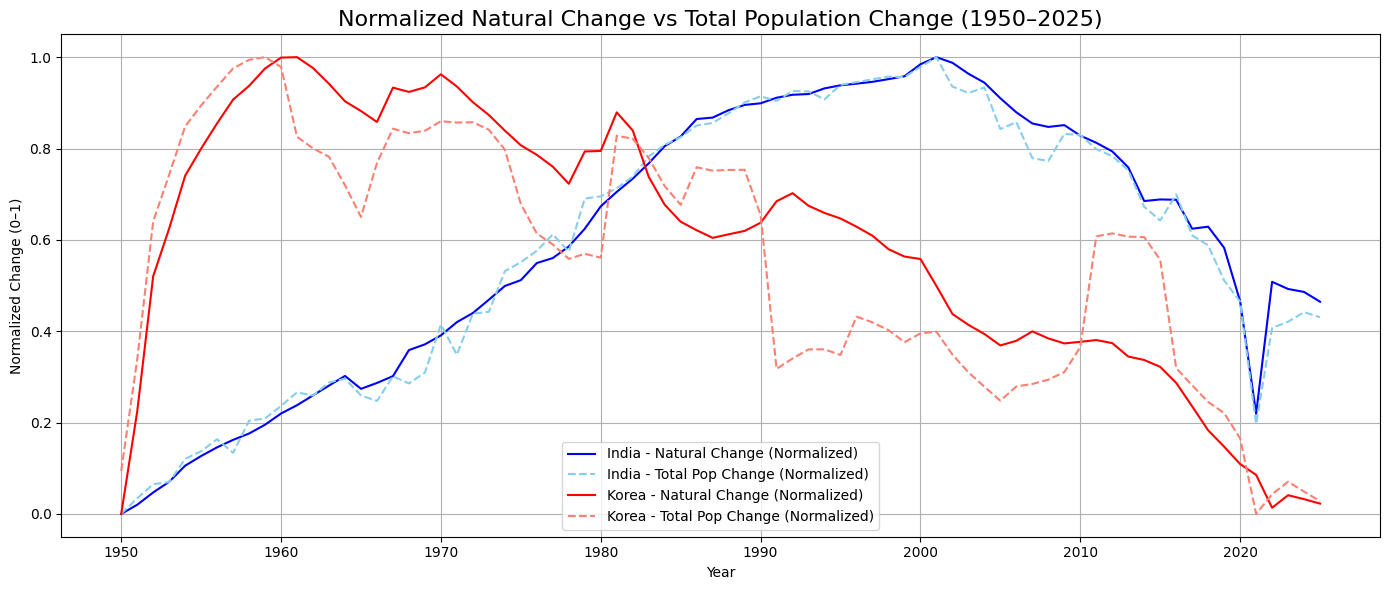

In [137]:


# Create copies
india_norm = india.copy()
korea_norm = korea.copy()

scaler = MinMaxScaler()

# Normalize India
india_norm[['NatChange_Norm', 'PopChange_Norm']] = scaler.fit_transform(
    india[['NatChange', 'PopChange']]
)

# Normalize Korea
korea_norm[['NatChange_Norm', 'PopChange_Norm']] = scaler.fit_transform(
    korea[['NatChange', 'PopChange']]
)

# Plotting
plt.figure(figsize=(14, 6))

# India
plt.plot(india_norm['Time'], india_norm['NatChange_Norm'], label='India - Natural Change (Normalized)', color='blue')
plt.plot(india_norm['Time'], india_norm['PopChange_Norm'], label='India - Total Pop Change (Normalized)', linestyle='dashed', color='skyblue')

# Korea
plt.plot(korea_norm['Time'], korea_norm['NatChange_Norm'], label='Korea - Natural Change (Normalized)', color='red')
plt.plot(korea_norm['Time'], korea_norm['PopChange_Norm'], label='Korea - Total Pop Change (Normalized)', linestyle='dashed', color='salmon')

plt.title('Normalized Natural Change vs Total Population Change (1950–2025)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Normalized Change (0–1)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### For South Korea Normalized Natural Change is negative and Total Population Change is also negative. This means that the population is declining naturally and overall (i.e., not enough migration to offset low births/high deaths). This indicates sustained population decline.

## 9) Population Density Trends (1950–2025)

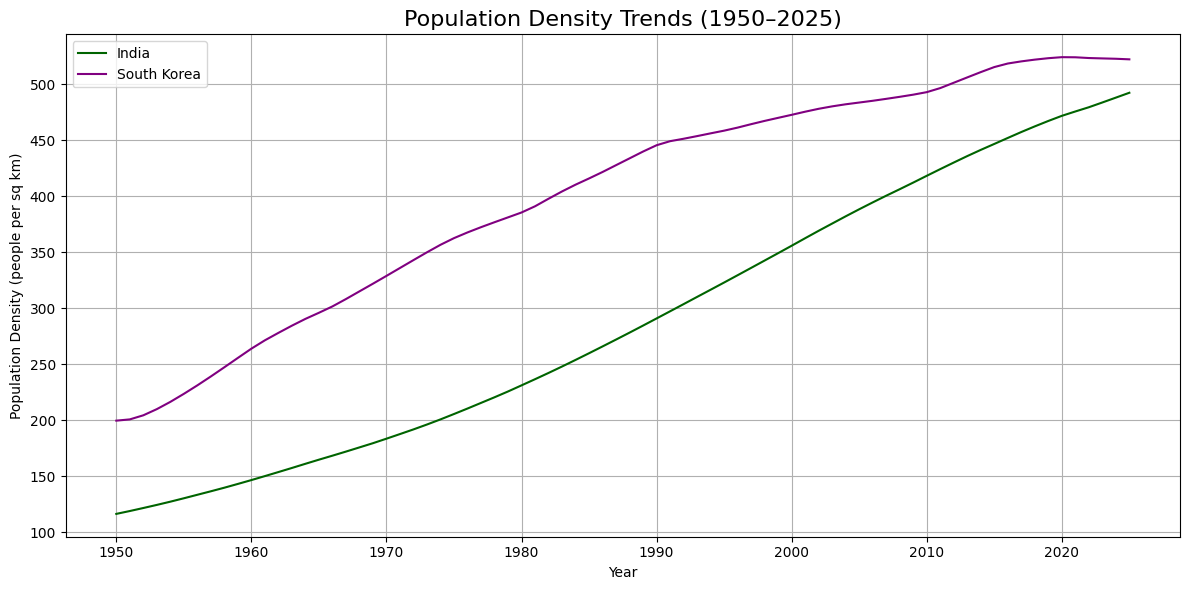

In [138]:
plt.figure(figsize=(12, 6))

plt.plot(india['Time'], india['PopDensity'], label='India', color='darkgreen')
plt.plot(korea['Time'], korea['PopDensity'], label='South Korea', color='purple')

plt.title('Population Density Trends (1950–2025)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Population Density (people per sq km)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### The population density of South Korea is high because South Korea is a smaller country when compared to India

## 10) Net Migration Trends

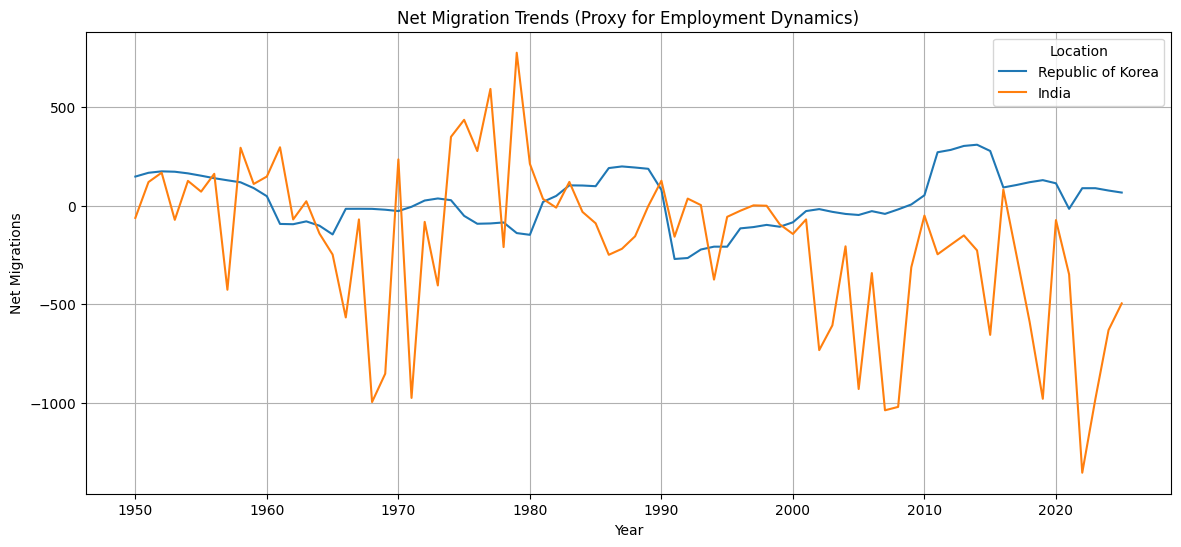

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for only India and Korea till 2025
df_plot = clean_df[(clean_df['Time'] <= 2025) &
                   (clean_df['Location'].isin(['India', 'Republic of Korea']))]

plt.figure(figsize=(14, 6))
sns.lineplot(data=df_plot, x='Time', y='NetMigrations', hue='Location')
plt.title('Net Migration Trends (Proxy for Employment Dynamics)')
plt.xlabel('Year')
plt.ylabel('Net Migrations')
plt.grid(True)
plt.show()


### we observe that during the 21st century more people migrated to South Korea for better jobs, etc because it emerged as a new hub of AI and Silicon chips. Whereas during 21st century more people migrated from India to other countries in search of better opportunities.

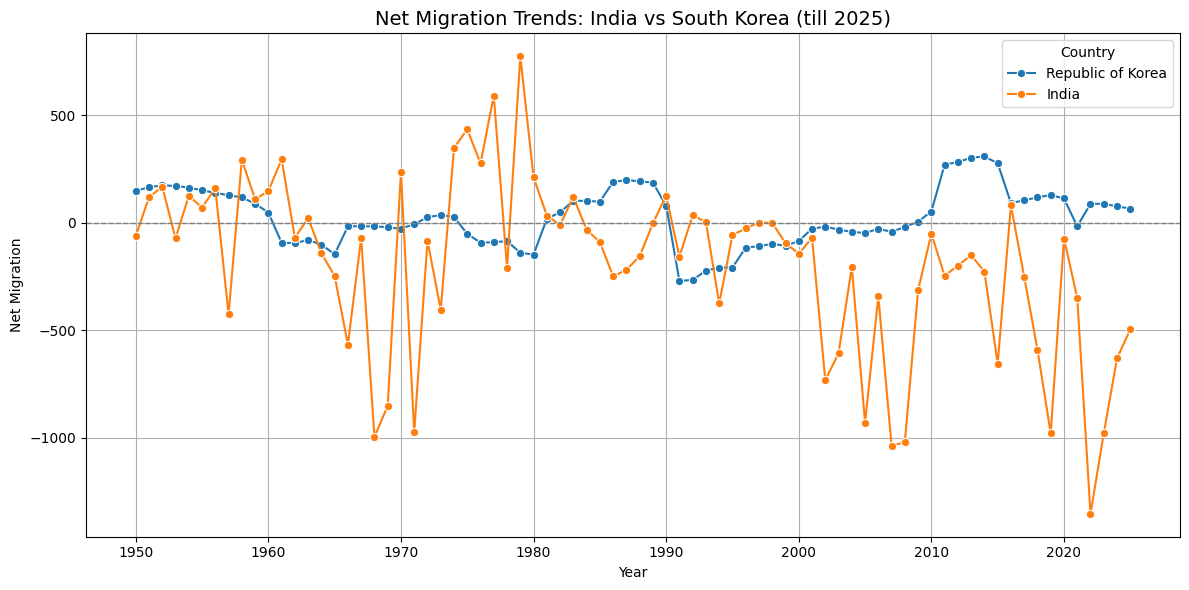

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for India and Korea till 2025
df_plot = clean_df[
    (clean_df['Location'].isin(['India', 'Republic of Korea'])) &
    (clean_df['Time'] <= 2025)
]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_plot, x='Time', y='NetMigrations', hue='Location', marker='o')

plt.title('Net Migration Trends: India vs South Korea (till 2025)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Net Migration')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Optional: horizontal line at 0
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


## 11) Normalized Elderly Dependency Ratio Trend - India vs South Korea (till 2025)

<ipython-input-142-1335139128>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['ElderlyPopulation'] = df_plot['LE65']
<ipython-input-142-1335139128>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['WorkingAgePopulation'] = df_plot['TPopulation1July'] - df_plot['LE65']
<ipython-input-142-1335139128>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

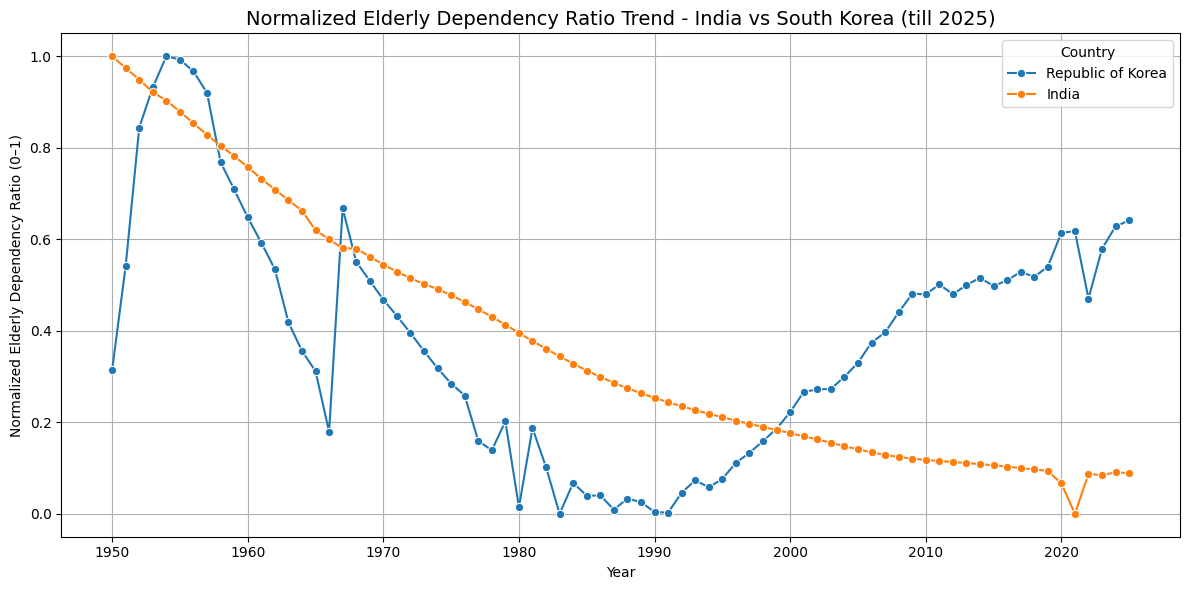

In [142]:


# Step 1: Recompute EDR if not present
if 'ElderlyDependencyRatio' not in df_plot.columns:
    df_plot['ElderlyPopulation'] = df_plot['LE65']
    df_plot['WorkingAgePopulation'] = df_plot['TPopulation1July'] - df_plot['LE65']
    df_plot['ElderlyDependencyRatio'] = df_plot['ElderlyPopulation'] / df_plot['WorkingAgePopulation']

# Step 2: Copy dataframe and initialize scaler
df_norm = df_plot.copy()
scaler = MinMaxScaler()

# Step 3: Normalize EDR by country
for country in df_norm['Location'].unique():
    mask = df_norm['Location'] == country
    df_norm.loc[mask, 'ElderlyDependencyRatioNorm'] = scaler.fit_transform(
        df_norm.loc[mask, ['ElderlyDependencyRatio']]
    )

# Step 4: Plot normalized values
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_norm, x='Time', y='ElderlyDependencyRatioNorm', hue='Location', marker='o')

plt.title('Normalized Elderly Dependency Ratio Trend - India vs South Korea (till 2025)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Normalized Elderly Dependency Ratio (0–1)')
plt.grid(True)
plt.legend(title='Country')
plt.tight_layout()
plt.show()


### When we compare the Elderly Dependency Ratio(EDR) between India and South Korea we observe that during 2025 the EDR of South Korea is almost 5 times as that of India

In [ ]:
clean_df.to_csv('clean_population_data.csv', index=False)
